## Diving Deeper into Pandas

First we will use a simple data set on mouse weights taken from males and females of different strains to illustrate how to obtain simple descriptive statistics, group the data, and plot. 

To start, we'll load up two modules with the `import` statement. The first is the `pandas` module, which will let us manipulate 2D tables. We refer to the `pandas` module here as `pd` as an abbreviation. The second module we load is the `numpy` module, mostly for the arithmetic functions built into it.

When you load a module using `import`, all of the functions available, such as `np.mean` are now accessible to you. 

First, let's load the data up using the `pd.read_csv` function. If you want to see where the dataset is, it's in the `day-2/data/` folder.

In [8]:
import pandas as pd
import numpy as np

mousedata = pd.read_csv("data/mouseData.csv")
mousedata

,MouseID,Gender,Strain,Weight
0,M1,M,B6,52.6
1,M2,M,B6,55.1
2,M3,M,B6,56.5
3,M4,M,B6,56.4
4,M5,M,D2,60.1
5,M6,M,D2,62.2
6,M7,M,D2,63.4
7,M8,M,D2,65.5
8,M9,F,B6,40.4
9,M10,F,B6,39.9


In [9]:
mousedata.describe()

,Weight
count,16.000000
mean,50.750000
std,9.136885
min,39.900000
25%,42.925000
50%,49.050000
75%,57.400000
max,65.500000


## A Quick Intro to functions

You can think of a function as a bit of reusable code. The important thing is that you need to define the inputs (what goes into the function) and the output (what comes out of the function).

Try and run the following function. What does it do?

Note that the bit of code that we want to run must be indented, since that is how we define code blocks in python. 

In [5]:
## functions always begin with def, 
##have an interface defined in the "()", 
##and the definition ends in ":"
def square_x(x):
    out = x * x
    return out

square_x(40)

1600

## Exercise

Make a new function called `cube_y` that takes `y` as an input, and returns the cube of `y`. 

Run `cube_y(2)` to test out your function.

In [ ]:
## space for your answer here



For the most part, we actually will want multiple inputs to our function, so we can do this by supplying more inputs to our function interface.

In [6]:
def mult_xy(x, y):
    out = x * y
    return out

mult_xy(10, 5)

50

## Grouping

Another great DataFrame function is `groupby()`. It will group a DataFrame by one or more columns, and let you iterate through each group. 

In [10]:
group_mouse = mousedata.groupby(['Gender'])

group_mouse

In [11]:
group_mouse.get_group('M')

,MouseID,Gender,Strain,Weight
0,M1,M,B6,52.6
1,M2,M,B6,55.1
2,M3,M,B6,56.5
3,M4,M,B6,56.4
4,M5,M,D2,60.1
5,M6,M,D2,62.2
6,M7,M,D2,63.4
7,M8,M,D2,65.5


What can you do with `groupby()`? One way to use it is to get *aggregate measures* based on group. For example, if we wanted to get the mean weight by gender, we can use the `apply` method on our data frames to return this. First we define a simple function called `mean_x` that returns the mean (we could have just used `np.mean` here, but it makes the code a little easier to understand). 

Then we can use this function to get the mean by gender. 

**Question**: why did the `groupby` only return `Weight`?

In [ ]:
def mean_x(x):
    return np.mean(x)

mousedata.groupby(['Gender']).apply(mean_x)


## Exercise

Define a function to calculate the standard deviation (in numpy the function you need will be called `np.std`) and apply it to return the standard deviation of weights by `Strain`.

In [ ]:
## Space for your answer here.

## Plotting

Let's look at some ways to visualize our `DataFrame`. We are going to use a module called `seaborn` to do our plotting, because the default plot options are pretty good, so we have to do less customization.

Let's just plot the distribution of weights as a histogram. How many bins does our histogram have?

In [13]:
## import the two modules we need: matplotlib and seaborn
import matplotlib.pyplot as plt 
import seaborn as sns

##we need this line in our notebook to make matplotlib/seaborn work with Jupyter
%matplotlib inline

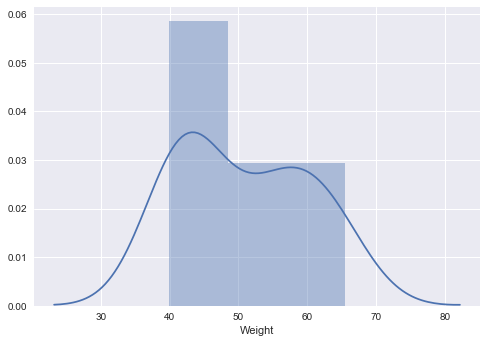

In [14]:
# Histogram of weights
sns.distplot(mousedata.Weight)

## Exercise

Look up the help for `sns.distplot`. Change the number of bins to 40 in the plot.

In [ ]:
## Space for your answer here.

help(sns.distplot)

## Boxplots

Boxplots are super useful for looking at grouped means. Here we use the `sns.boxplot` function and group by `Gender`.

In [ ]:
# Boxplot
sns.boxplot(x = "Gender", y="Weight", data=mousedata)

Let's make a boxplot showing weights for males and females separately. To do this, we need to "map" `Weight` to our y-axis using the `y` argument to `sns.boxplot`. In order to separate by gender, we map `Gender` to our x-axis.

**Question**: Is there a difference in mouse weights separated by `Gender`?

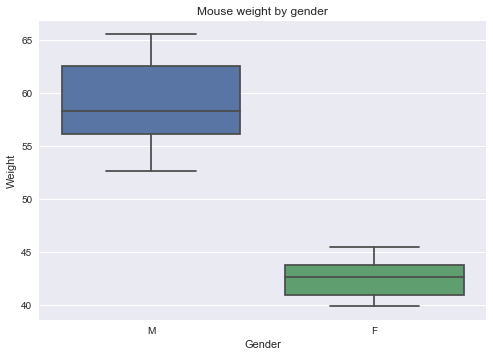

In [15]:
#do a box plot by gender
sns.boxplot(x = "Gender", y="Weight", data=mousedata)

# Set title with matplotlib
plt.title('Mouse weight by gender')
plt.show()

## Exercise 

Create boxplots showing the weight data measured from the 2 different strains, B6 and D2. Make sure to add a title to your plot, such as "Weight by Strain".

In [ ]:
##Space for your answer here


## Faceting

Faceting is one of the most powerful ways of exploring data. For example, we can see whether there is a `Strain` by `Gender` effect by producing *conditional* boxplots.


## A more complicated example

Yesterday you learned a little bit about loading data into Pandas. We're going to do much more manipulation and visualization with Pandas using data taken from Imaris. Imaris is image analysis software with many sophisticated functions. Below is a confocal image taken of inner hair cells stained with antibodies against CtBP2 (a pre-synaptic ribbon marker), GluR2 (a post-synaptic receptor) and MyosinVIIA (which labells the entire hair cell). There are three color channels (red, green, and blue) which indicate the intensity of the staining for CtBP2, GluR2 and MyosinVIIa, respectively.


## The data

Up to 25 auditory nerve fibers synapse onto individual inner hair cells in
normal-hearing individuals. However, these synapses can be permanently lost due
to aging, exposure to noise or ototoxic drugs.  In experiments that study
hearing loss, we need a way of quantifying the number of synapses per inner
hair cell.

One approach is to dissect the cochlea out of the experimental animals and use
whole-mount immunohistochemistry to label the tissue with antibodies for
pre-synaptic ribbons (CtBP2), post-synaptic receptors (GluR2) and cytoskeleton
(Myosin VIIa). In a second step, each antibody is tagged with a fluorescent dye
that can be illuminated using a laser (much like how a black light can cause
certain materials to glow).

The distribution of these fluorescent dyes (which map to the underlying
distribution of the proteins of interest) can be captured by taking a series of
two-dimensional images at various depths in the tissue.  These images are then
"stacked" to create a three-dimensional image known as a Z-stack (since the
third dimension is commonly referred to as the Z-axis).

<table>
	<body>
		<tr>
			<td>1A. CtBP2 (pre-synaptic ribbon)</td>
			<td>1B. GluR2 (post-synaptic glutamate receptor)</td>
		</tr>
		<tr>
			<td><img src="../day-4/data/CtBP2.png" /></td>
			<td><img src="../day-4/data/GluR2.png" /></td>
		</tr>
	</body>
</table>

## The problem

A functional inner hair cell synapse requires both a pre-synaptic ribbon and a
post-synaptic glutamate receptor. The next step in our analysis is to determine
whether each CtBP2 puncta is near a GluR2 label. 

This dataset was analyzed using Imaris to identify all CtBP2 puncta (white dots
in fig. 2a). If you look closely at the composite (fig. 2b), you'll see that
not all puncta have a glutamate receptor patch next to them (fig. 2b)! We
should not be counting these for the purpose of analysis. So, we need to find a
way to detect these false hits and eliminate them.

<table>
	<body>
		<tr>
			<td>A. CtBP2 puncta</td>
			<td>B. CtBP2 puncta overlaid on GluR2</td>
		</tr>
		<tr>
			<td><img src="../day-4/data/CtBP2+points.png" /></td>
			<td><img src="../day-4/data/CtBP2+GluR2+points.png" /></td>
		</tr>
	</body>
</table>

One approach is to extract a fixed volume around each CtBP2 puncta (e.g., a 1um
cube) and quantify the amount of GluR2 label in the volume. But, we don't know
very much about the format of the data. We need to do a little exploration
first.

We used Imaris to detect all the "spots" in the CtBP2 (red) channel and compute some statistics about these spots. We've extracted the statistics file from the imaris file just to make things easier. Just know that there are routines to extract this information from the file.

In [ ]:
import pandas as pd

point_stats = pd.read_csv("data/points_statistics.csv")

## Exploring the Imaris Statistics

Because this data file was automatically generated by Imaris, we first need to figure out how it is organized.

We can start taking a look at the first few rows of our summary table using `point_stats.head()`. In general, this is a really good practice to get into; sometimes our data may have a header or not, and we may have loaded the data incorrectly.

In [ ]:
##Show first few rows
point_stats.head()

What are some things we notice? Well, there appear to be some data that describe the entire sample (such as "Total Number of Spots") as well as data for localized points identified by Imaris in the red channel (such as "Area").  

In [ ]:
##show last few rows
point_stats.tail()

In [ ]:
##show dimensions of data frame
point_stats.shape

We can also see that attributes for the various traits describing a given spot (such as "Area" and "Volume") are not columns, but rather listed under the categorical column "Name." If we are curious to see this full list of names, use the unique() function: 

In [ ]:
point_stats.Name.unique()

If we want to take the data as is and run some simple descriptive statistics for each column:

In [ ]:
point_stats.describe()

Notice that Python only computes statistics for variables with numerical values.

ID_Object of -1 designates statistics that describe the entire sample. What if we want to look only at data with ID_Object of -1:

In [ ]:
point_stats[point_stats["ID_Object"]==-1]

Let's look at all of the statistics that were collected for a single spot identified by Imaris.

In [ ]:
point_stats[point_stats["ID_Object"]==1]

Let's look at the raw data for Diameter of spots in the X dimension ("Diameter X"):

In [ ]:
point_stats[point_stats["ID_StatisticsType"]==237].head(20)
#OR
point_stats[point_stats["Name"]=="Diameter X"].head(20)

In [ ]:
#What if you only want to view ID_Object, Value, and Name?
point_stats.iloc[:,[1,3,6]].head(20)
##OR
point_stats.loc[:,["ID_Object", "Value", "Name"]]

## Exercise

Use our `mean_x` function to return the mean `Max Intensity X` across the dataset.

In [ ]:
## Space for your answer here



## Pivoting

Now let's create a DataFrame that is more intuitive in terms of viewing the statistics Imaris has collected for each identified spot in the red channel. We will call this DataFrame `point_stats_matrix`. To do this, use the `pivot()` function, which reshapes data based on column values. This function is extremely useful in transforming data from *long* format to *wide* format. 

The `pivot` method takes three arguments: `index`, which you can think of as being the rows of the data, `columns`, which specify what columns should exist in the data, and `values`, which are the actual numerical values we want in each Cell.

In [ ]:
point_stats_matrix = point_stats.pivot(index='ID_Object', columns='Name', values='Value')
point_stats_matrix.head()

Remember that the statistics for the entire data set (including "Number of spots per time point" and "Total number of spots") have an ID_Object of -1. Let's remove this row:

In [ ]:
point_stats_matrix = point_stats_matrix.drop(-1)
point_stats_matrix.head(20)

In [ ]:
point_stats_matrix.describe()

## Plotting our DataFrame

Next let's try some simple visualization, starting with a histogram of area measurements for the spots: 

In [ ]:
import matplotlib.pyplot as plt 
sns.distplot(point_stats_matrix.Area)

Now how to add labels to axes?

How about a boxplot of Area values?

In [ ]:
point_stats_matrix.boxplot("Area")

In [ ]:
import seaborn as sns
psm = point_stats_matrix

sns.lmplot(x='Intensity Max X', y='Intensity Max Y', fit_reg=False, data=psm)

## Exercise

Take a look at the help for `lmplot` below. 

In [ ]:
help(sns.lmplot)



In [ ]:
cmap = sns.cubehelix_palette(as_cmap=True)

sns.lmplot(x='Intensity Max X', y='Intensity Max Y', fit_reg=False, data=psm)

## Filtering

Next we will discuss filtering, sticking with our area data to keep things simple. The boxplot you created for area shows the median area to be about 3.5. What if we want to create a DataFrame named `large_points` that only includes spots with an area greater than 5?

In [ ]:
large_points=point_stats_matrix[point_stats_matrix.Area >= 5]
large_points.describe()

**Question**: what is the output of `point_stats_matrix.Area >= 5`? Try it out by running the below cell. 
    
How does this help us select the rows we want out of `point_stats_matrix`? (Hint: Think about what `True` and `False` mean.)

In [ ]:
point_stats_matrix.Area >= 5

## Exercise

Filter the `points_stats_matrix` dataset to have `Intensity Center X` > 10000 and assign it to `psm10000`. (Because of the spaces, you will have to use points_stats_matrix['Intensity Center X'] to access the column).

Plot a scatter plot of `psm10000['Position X']` versus `psm10000['Position Y']`.

In [ ]:
##space for your answer here.

## Computing a new column based on other columns

Pandas gets extremely powerful in that you can add new columns based on calculations from other columns.

## Getting data out

What if you want to save the `point_stats_matrix` DataFrame as its own csv file? Try running the code below. Where did it write the dataset?

In [ ]:
point_stats_matrix.to_csv("data/point_stats-mod.csv")

There is also support for reading and writing Excel files if you need it: http://pandas.pydata.org/pandas-docs/stable/io.html#excel-files

## What you learned today

Congrats for getting this far! You have seen lots of features of Pandas and Seaborne that let you manipulate the data and visualize it. 

1. `group_by`
2. Filtering
3. Boxplots and Scatterplots
4. Faceting
5. Pivoting data